<p style="font-family:Roboto; font-size: 28px; color: magenta"> Python for NLP: PSentiment Analysis with Scikit-Learn</p>

In [48]:
'''
  The sentiment analysis is one of the most commonly performed NLP tasks 
  as it helps determine overall public opinion about a certain topic.

  We performed an analysis of public tweets regarding six US airlines and achieved an accuracy of around 75%
  0.7592213114754098
'''

'\n  The sentiment analysis is one of the most commonly performed NLP tasks \n  as it helps determine overall public opinion about a certain topic.\n\n  We performed an analysis of public tweets regarding six US airlines and achieved an accuracy of around 75%\n  0.7592213114754098\n'

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Importing the Required Libraries</p>

In [24]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Importing the Dataset</p>

In [25]:
airline_tweets = pd.read_csv('data/Tweets.csv')

In [26]:
airline_tweets.sample()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
6611,567758180068130816,positive,1.0,NaN,NaN,Southwest,NaN,colorsflashing6,NaN,0,@SouthwestAir @PaytonTaylor129 I love Southwes...,NaN,2015-02-17 10:51:13 -0800,"Nashville, TN",Eastern Time (US & Canada)


<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Data Analysis</p>

In [27]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


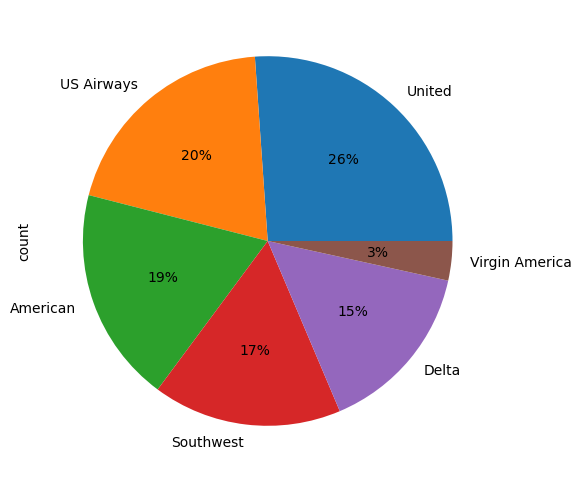

In [28]:
'''Let's first see the number of tweets for each airline. We will plot a pie chart for that:'''
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

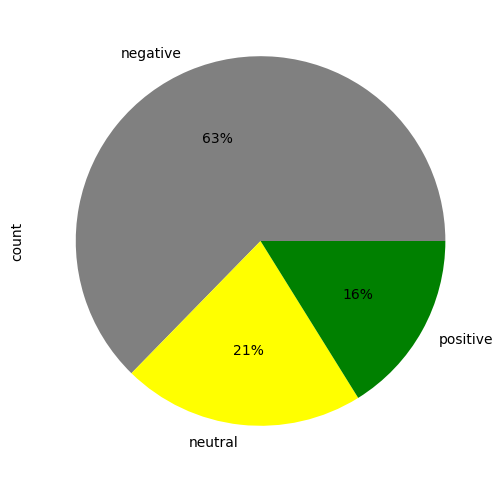

In [ ]:
'''Let's now see the distribution of sentiments across all the tweets. Execute the following script:'''
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["gray", "yellow", "green"])
plt.show()

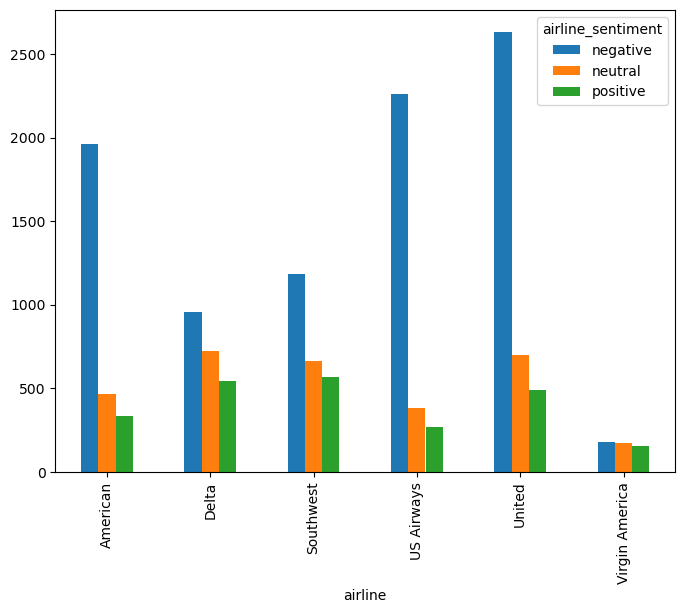

In [30]:
'''From the output, you can see that the majority of the tweets are negative (63%), 
followed by neutral tweets (21%), and then the positive tweets (16%).'''

'''Next, let's see the distribution of sentiment for each individual airline,'''
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
# Custom colors
 
airline_sentiment.plot(kind='bar')
plt.show()

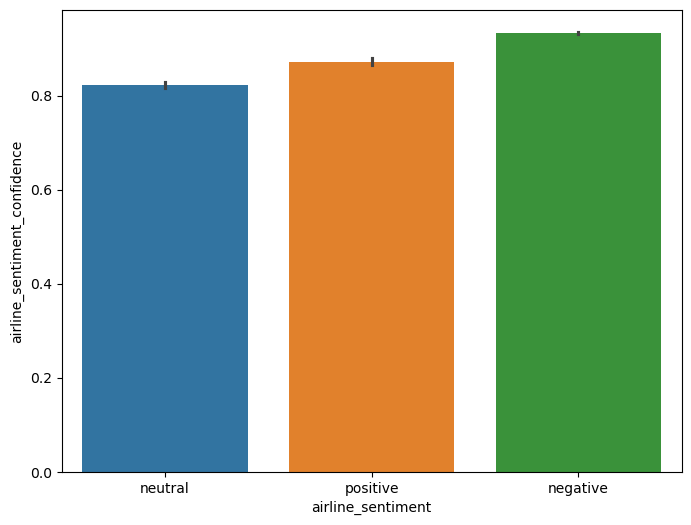

In [39]:
'''
Finally, let's use the Seaborn library to view the average confidence level 
for the tweets belonging to three sentiment categories
'''
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets, hue='airline_sentiment')
plt.show()

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Data Cleaning</p>

In [40]:
'''
 If we look at our dataset, the 11th column contains the tweet text.
 Note that the index of the column will be 10 since pandas columns follow zero-based indexing scheme 
 where the first column is called 0th column. Our label set will consist of the sentiment of the tweet 
 that we have to predict. 
 The sentiment of the tweet is in the second column (index 1).
'''
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [42]:
'''we can preprocess data in order to clean it''' 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    # To remove all the non-word characters, the \W pattern
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    # To check if a string starts with a specific word, you can use the carrot key i.e. ^
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    # spaces can be removed using the \s pattern which refers to a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    # To remove a prefixed "b" (commonly seen in byte strings in Python, e.g., b'string')
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


<p style="font-family:consolas; font-size: 26px; color: orange; text-decoration-line: overline; "> Part: _Representing Text in Numeric Form</p>

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Bag of Words</p>

In [ ]:
'''
    In the bag of words approach the first step is to create a vocabulary of all the unique words.
        The next step is to convert each document into a feature vector using the vocabulary. 
'''

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _TF-IDF</p>

In [ ]:
'''
The idea behind the TF-IDF approach is that the words that occur less in all the documents 
and more in individual documents contribute more towards classification.

TF  = (Frequency of a word in the document)/(Total words in the document)

IDF = Log((Total number of docs)/(Number of docs containing the word))
'''


<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _TF-IDF using the Scikit-Learn Library</p>

In [43]:
'''Python's Scikit-Learn library contains the TfidfVectorizer class 
that can be used to convert text features into TF-IDF feature vectors'''
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Dividing Data into Training and Test Sets</p>

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Training the Model</p>

In [45]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

<p style="font-family:Roboto; font-size: 22px; color: orange; text-decoration-line: overline; "> Part: _Making Predictions and Evaluating the Model</p>

In [46]:
predictions = text_classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1722  108   40]
 [ 327  247   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928

0.7592213114754098
